# Wine_Quality_Analysis

##### Author - Jyotindra Kumar 
##### Major Project on wine quality analysis

# Description of Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('Red_wine.csv')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [4]:
df.describe().T  # Transpose


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [6]:
for col in df.columns:
    
    if df[col].isnull().sum() > 0:
        
    
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

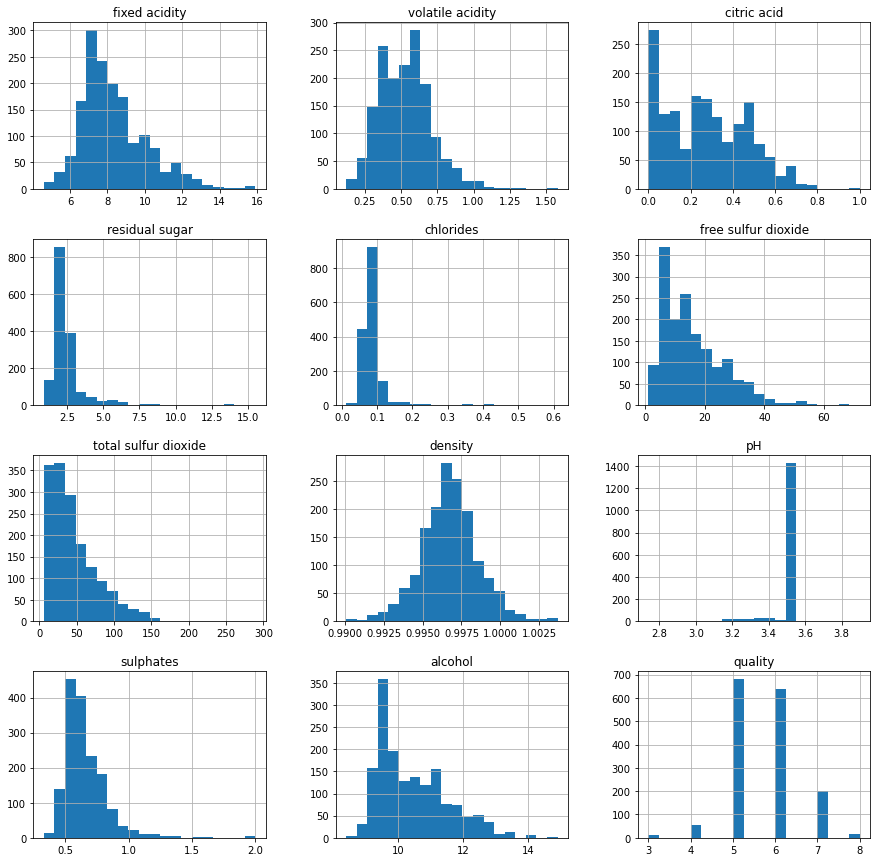

In [7]:
df.hist(bins=20, figsize=(15, 15))
plt.show()


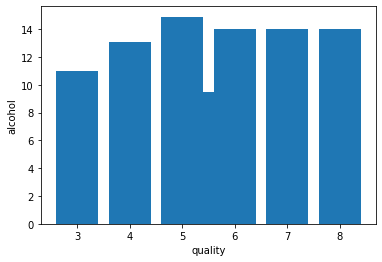

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

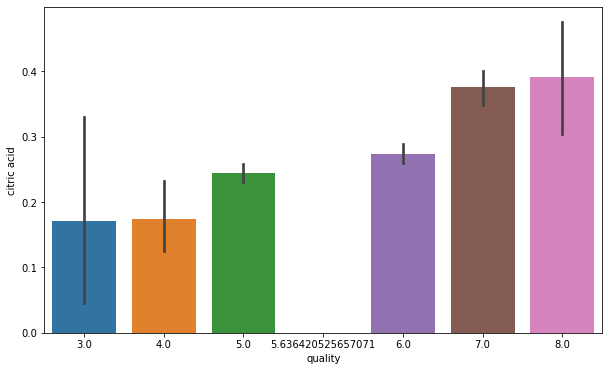

In [9]:
import seaborn as sns
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

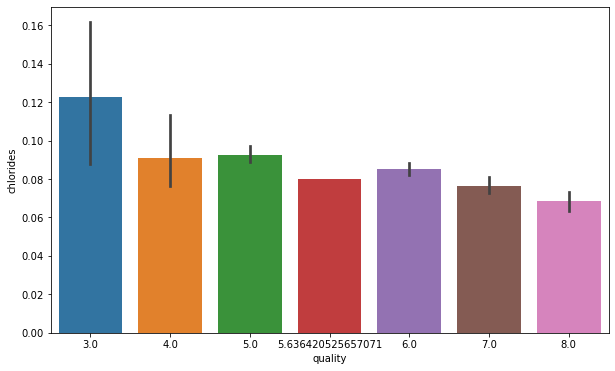

In [10]:
import seaborn as sns
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides',data=df)

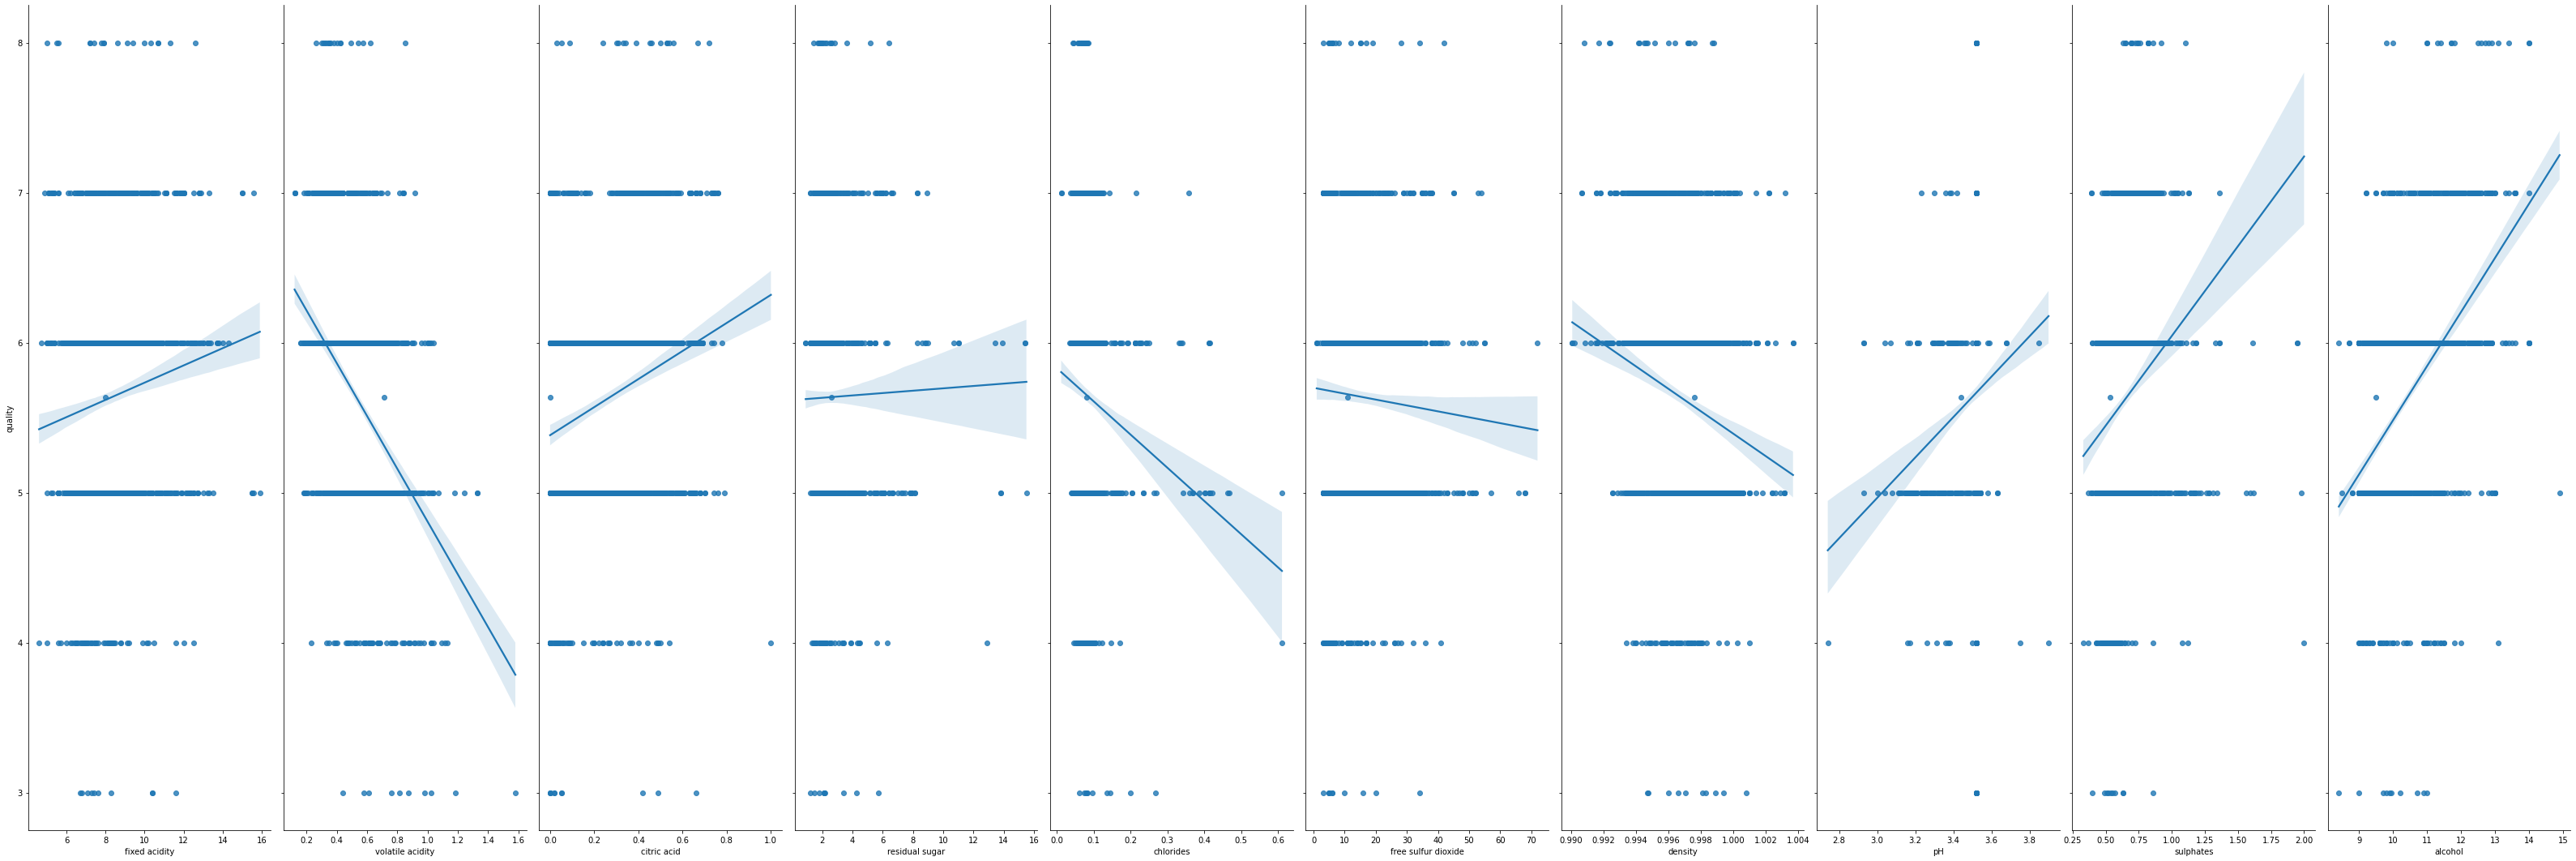

In [11]:
features=['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','density',
          'pH','sulphates','alcohol']
x= df[features]
y= df['quality']

import seaborn as sns
#plotiing features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=15,aspect=0.3)

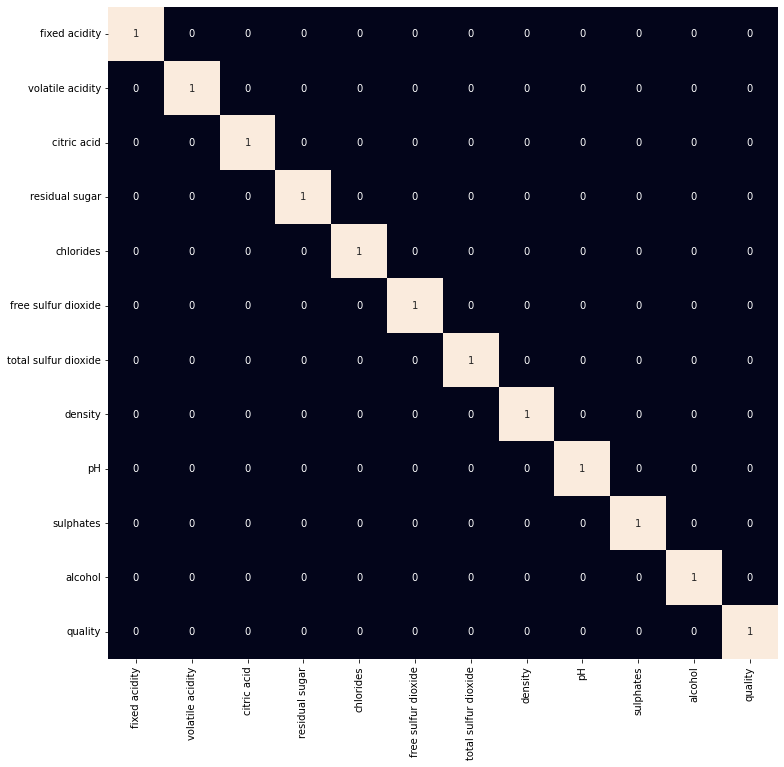

In [12]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [13]:
# From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated
#features so, we will remove them.

In [14]:
df = df.drop('total sulfur dioxide', axis=1)


In [15]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


In [16]:
df.replace({'white': 1, 'red': 0}, inplace=True)


In [17]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((1279, 10), (320, 10))

In [18]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0,0
5,7.4,0.660,0.00,1.8,0.075,13.0,0.9978,3.51,0.56,9.4,5.0,0
6,7.9,0.600,0.06,1.6,0.069,15.0,0.9964,3.30,0.46,9.4,5.0,0
7,7.3,0.650,0.00,1.2,0.065,15.0,0.9946,3.39,0.47,10.0,7.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,0.9968,3.36,0.57,9.5,7.0,1
9,7.5,0.500,0.36,6.1,0.071,17.0,0.9978,3.35,0.80,10.5,5.0,0


In [19]:
# Normalising the data before training help us to achieve stable and fast training of the model.
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [20]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()


LogisticRegression() : 
Training Accuracy :  0.7310879263415448
Validation Accuracy :  0.7711257913570052

[08:57:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
  

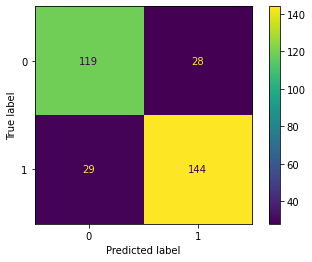

In [21]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()


In [22]:
print(metrics.classification_report(ytest,models[1].predict(xtest)))


              precision    recall  f1-score   support

           0       0.80      0.81      0.81       147
           1       0.84      0.83      0.83       173

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

